## Packages

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt

## Functions

In [2]:


def clean_and_add_date_column(df):
    """
    Cleans the DataFrame by forward-filling missing years, correcting month typos,
    and creating a 'Date' column in YYYY-MM format.
    """
    # Step 1: Forward fill the missing Year values
    df['Year'] = df['Year'].ffill().astype(int)

    # Step 2: Correct common month spelling errors
    month_corrections = {'Februrary': 'February'}
    df['Month'] = df['Month'].replace(month_corrections)

    # Step 3: Convert to datetime (first of each month), then to Year-Month string
    df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')
    df['Date'] = df['Date'].dt.to_period('M').astype(str)

    return df


In [ ]:


folder_path = r'F:\work\rudra sir\my_work\for_final'

water_level_raw = pd.read_excel(os.path.join(folder_path, "water_level_raw.xlsx"))

raw_pg= pd.read_excel(os.path.join(folder_path, "raw_pg.xlsx"))

daily_precipitation_1982 = pd.read_excel(os.path.join(folder_path, "daily_precipitation.xlsx"))

scenario_precipitation_2006_2100 = pd.read_excel(r"G:\learn\python_works\google_ee\rudra\datas\attatchments\scenario_2006_2100.xlsx")

water_discharge_2006_2100 = pd.read_excel(os.path.join(folder_path, "water discharge-2006-2100.xlsx"))

In [23]:
water_discharge_2006_2100

,Date,Total_Discharge,Year,YearMonth
0,2006-01-01,1.215665,2006,1
1,2006-01-02,1.594096,2006,1
2,2006-01-03,1.601063,2006,1
3,2006-01-04,1.622392,2006,1
4,2006-01-05,1.955107,2006,1
...,...,...,...,...
34693,2100-12-27,1.657149,2100,12
34694,2100-12-28,1.575802,2100,12
34695,2100-12-29,1.904341,2100,12
34696,2100-12-30,1.781661,2100,12


In [5]:

df = clean_and_add_date_column(water_level_raw)


In [6]:
# Remove 'Month' and 'Year' columns and move 'Date' to the front
cols = ['Date'] + [col for col in df.columns if col not in ['Date', 'Month', 'Year']]
water_level_raw_monthly = df[cols]

In [7]:
water_level_raw_monthly

,Date,Starting Level,End Level,Diff. Level,Energy
0,1990-01,1493.21,1503.96,10.75,17250.0
1,1990-02,1503.96,1503.75,-0.21,18641.0
2,1990-03,1503.75,1506.33,2.58,16134.0
3,1990-04,1506.33,1505.09,-1.24,10800.0
4,1990-05,1505.09,1501.73,-3.36,12011.0
...,...,...,...,...,...
403,2023-08,NaN,NaN,0.00,NaN
404,2023-09,NaN,NaN,0.00,NaN
405,2023-10,NaN,NaN,0.00,NaN
406,2023-11,NaN,NaN,0.00,NaN


In [8]:
# Convert 'Date' to datetime if not already
water_level_raw_monthly['Date'] = pd.to_datetime(water_level_raw_monthly['Date'], format='%Y-%m')

# Extract year for grouping
water_level_raw_monthly['Year'] = water_level_raw_monthly['Date'].dt.year

# DataFrame 1: Annual average of Starting Level, End Level, Diff. Level
annual_avg_levels = water_level_raw_monthly.groupby('Year')[['Starting Level', 'End Level', 'Diff. Level']].mean().reset_index()

# DataFrame 2: Annual average and total Energy
annual_energy = water_level_raw_monthly.groupby('Year')['Energy'].agg(['mean', 'sum']).reset_index()
annual_energy.rename(columns={'mean': 'Average Energy', 'sum': 'Total Energy'}, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14376\3893610201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_level_raw_monthly['Date'] = pd.to_datetime(water_level_raw_monthly['Date'], format='%Y-%m')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14376\3893610201.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_level_raw_monthly['Year'] = water_level_raw_monthly['Date'].dt.year


In [9]:
annual_avg_levels

,Year,Starting Level,End Level,Diff. Level
0,1990,1495.277500,1496.087500,0.810000
1,1991,1508.352500,1508.157500,-0.195000
2,1992,1499.559167,1498.852500,-0.706667
3,1993,1492.935000,1493.317500,0.382500
4,1994,1515.370833,1515.336667,-0.034167
5,1995,1503.662500,1505.190833,1.528333
6,1996,1519.766667,1518.959167,-0.807500
7,1997,1505.255000,1504.764167,-0.490833
8,1998,1506.095000,1506.552500,0.457500
9,1999,1513.198333,1514.601667,1.403333


In [10]:
# Ensure 'Date' in annual_energy is int (year) to match raw_pg
annual_energy['Date'] = annual_energy['Year'].astype(int)

# Find years in raw_pg not present in annual_energy
missing_years = set(raw_pg['Date']) - set(annual_energy['Date'])

# Add missing years to annual_energy with NaN for all columns
if missing_years:
    # Create DataFrame with NaN values for all columns except Date
    missing_df = pd.DataFrame({'Date': list(missing_years)})
    for col in annual_energy.columns:
        if col != 'Date':
            missing_df[col] = float('nan')
    annual_energy_extended = pd.concat([annual_energy, missing_df], ignore_index=True)
else:
    annual_energy_extended = annual_energy.copy()

# Sort by Date to align with raw_pg
annual_energy_extended = annual_energy_extended.sort_values('Date').reset_index(drop=True)

# Merge with raw_pg to align rows, keeping all columns from both DataFrames
raw_pg_merged = raw_pg.merge(annual_energy_extended, on='Date', how='left')

# Replace Power_generation with Total Energy where available
raw_pg_merged['Power_generation'] = raw_pg_merged['Total Energy'].combine_first(raw_pg_merged['Power_generation'])

# Keep all columns from both DataFrames (no dropping)
raw_pg_updated = raw_pg_merged.drop(columns=['Year', 'Total Energy'])

# Display the result with all columns
raw_pg_updated

,Date,Power_generation,Average Energy
0,1981,27434.00,NaN
1,1982,87417.00,NaN
2,1983,82293.00,NaN
3,1984,104012.00,NaN
4,1985,174411.00,NaN
5,1986,190395.00,NaN
6,1987,198077.00,NaN
7,1988,170883.00,NaN
8,1989,132594.00,NaN
9,1990,132594.00,11049.500000


In [11]:
# Convert Year in annual_avg_levels to Date to match raw_pg_updated
annual_avg_levels['Date'] = annual_avg_levels['Year'].astype(int)

# Merge raw_pg_updated with annual_avg_levels
merged_df = raw_pg_updated.merge(
    annual_avg_levels.drop(columns=['Year']),  # drop Year since we already have Date
    on='Date',
    how='outer'  # use outer join to keep all dates from both dataframes
)

# Sort by Date
merged_df = merged_df.sort_values('Date').reset_index(drop=True)

# Display the result
merged_df

,Date,Power_generation,Average Energy,Starting Level,End Level,Diff. Level
0,1981,27434.00,NaN,NaN,NaN,NaN
1,1982,87417.00,NaN,NaN,NaN,NaN
2,1983,82293.00,NaN,NaN,NaN,NaN
3,1984,104012.00,NaN,NaN,NaN,NaN
4,1985,174411.00,NaN,NaN,NaN,NaN
5,1986,190395.00,NaN,NaN,NaN,NaN
6,1987,198077.00,NaN,NaN,NaN,NaN
7,1988,170883.00,NaN,NaN,NaN,NaN
8,1989,132594.00,NaN,NaN,NaN,NaN
9,1990,132594.00,11049.500000,1495.277500,1496.087500,0.810000


In [12]:
# Extract year from the Date column
water_discharge_2006_2100['Year'] = water_discharge_2006_2100['Date'].dt.year

# Group by year and calculate the mean discharge
annual_avg_discharge = water_discharge_2006_2100.groupby('Year')['Total_Discharge'].mean().reset_index()

annual_avg_discharge

,Year,Total_Discharge
0,2006,6.349264
1,2007,8.093993
2,2008,7.802677
3,2009,7.026365
4,2010,7.227611
...,...,...
90,2096,10.685075
91,2097,10.011130
92,2098,10.296433
93,2099,9.597890


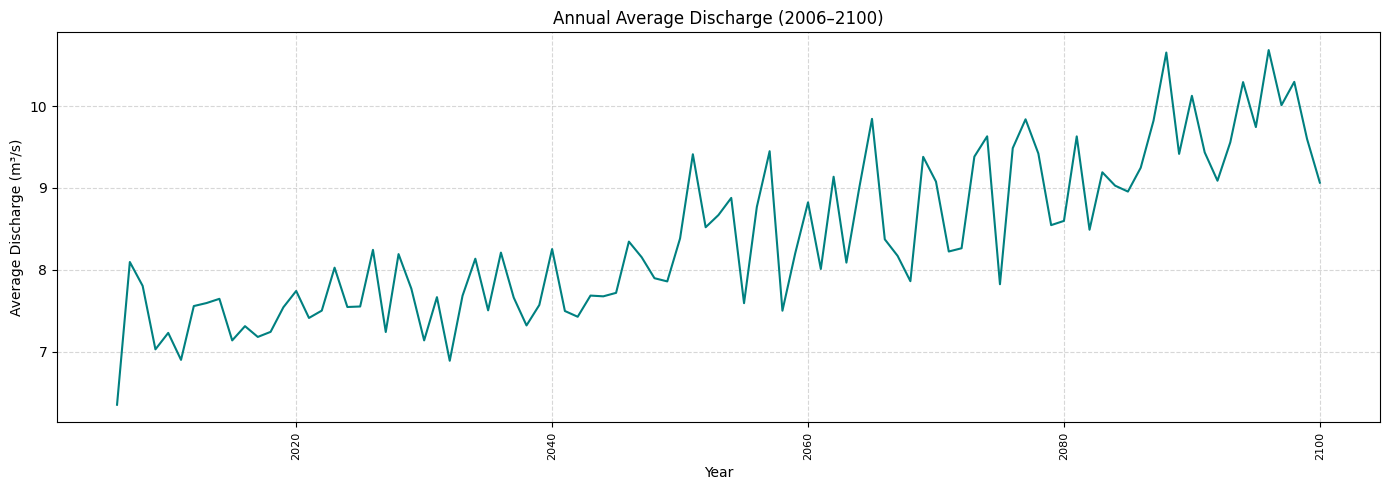

In [13]:


# Plotting
plt.figure(figsize=(14, 5))
plt.plot(annual_avg_discharge['Year'], annual_avg_discharge['Total_Discharge'], color='teal')
plt.xlabel('Year')
plt.ylabel('Average Discharge (m³/s)')
plt.title('Annual Average Discharge (2006–2100)')
plt.xticks(rotation=90, fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()





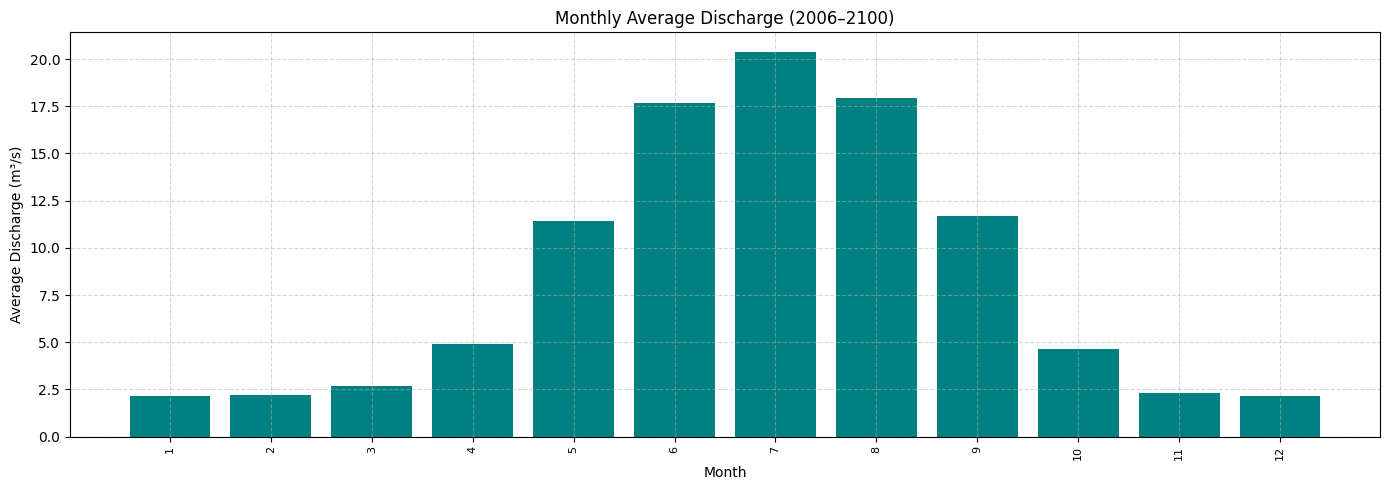

In [14]:


# Ensure 'Date' is in datetime format
water_discharge_2006_2100['Date'] = pd.to_datetime(water_discharge_2006_2100['Date'])

# Extract year and month as a single period (e.g., 2006-01)
water_discharge_2006_2100['YearMonth'] = water_discharge_2006_2100['Date'].dt.month
# Group by YearMonth and calculate mean discharge
monthly_avg_discharge = (
    water_discharge_2006_2100
    .groupby('YearMonth')['Total_Discharge']
    .mean()
    .reset_index()
)

# Convert YearMonth to string for plotting
monthly_avg_discharge['YearMonth'] = monthly_avg_discharge['YearMonth'].astype(str)

# Plotting
plt.figure(figsize=(14, 5))
plt.bar(monthly_avg_discharge['YearMonth'], monthly_avg_discharge['Total_Discharge'], color='teal')
plt.xlabel('Month')
plt.ylabel('Average Discharge (m³/s)')
plt.title('Monthly Average Discharge (2006–2100)')
plt.xticks(rotation=90, fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

# -----------------------------
# 1. Load and prepare observed data
# -----------------------------
obs_data = pd.read_excel(r"G:\learn\python_works\google_ee\rudra\datas\attatchments\Rainfall_Monthly.xlsx")
obs_data['Date'] = pd.to_datetime(obs_data['Date'])
obs_data['Year'] = obs_data['Date'].dt.year
obs_data['Month'] = obs_data['Date'].dt.month

# Calculate monthly linear trends in observed precipitation
monthly_trends = {}
for month in range(1, 13):
    month_subset = obs_data[obs_data['Month'] == month]
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        month_subset['Year'], month_subset['Precipitation']
    )
    monthly_trends[month] = {'slope': slope, 'intercept': intercept}

# -----------------------------
# 2. Prepare simulated data
# -----------------------------
sim_data = scenario_precipitation_2006_2100.copy()
sim_data['Date'] = pd.to_datetime(sim_data['Date'])
sim_data['Year'] = sim_data['Date'].dt.year
sim_data['Month'] = sim_data['Date'].dt.month

# Convert daily to monthly totals
sim_monthly = sim_data.groupby(['Year', 'Month'])['Precipitation'].sum().reset_index()
sim_monthly.rename(columns={'Precipitation': 'Sim_Precip'}, inplace=True)

# -----------------------------
# 3. Train Random Forest model on overlap period
# -----------------------------
obs_overlap = obs_data[(obs_data['Year'] >= 2006) & (obs_data['Year'] <= 2022)]
train_data = pd.merge(obs_overlap, sim_monthly, on=['Year', 'Month'], how='inner')
train_data.rename(columns={'Precipitation': 'Obs_Precip'}, inplace=True)

# Define training features and target
feature_cols = ['Sim_Precip', 'Month', 'Year']
X_train = train_data[feature_cols]
y_train = train_data['Obs_Precip']

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# -----------------------------
# 4. Apply bias correction with trend preservation
# -----------------------------
# Step 1: Predict using trained model
X_all = sim_monthly[feature_cols]
sim_monthly['RF_Predicted'] = rf_model.predict(X_all)

# Step 2: Add observed trend component
start_year = obs_data['Year'].min()

# Create an array of slopes corresponding to each row's month
slopes = sim_monthly['Month'].map(lambda m: monthly_trends[m]['slope'])

# Calculate the trend adjustment vectorized
trend_adjustment = slopes * (sim_monthly['Year'] - start_year)

# Add trend adjustment to predicted values
sim_monthly['Corrected_Precip'] = sim_monthly['RF_Predicted'] + trend_adjustment


# Step 3: Ensure no negative corrected values
sim_monthly['Corrected_Precip'] = sim_monthly['Corrected_Precip'].clip(lower=0)


sim_monthly.to_excel(r"G:\learn\python_works\google_ee\rudra\datas\attatchments\corrected_monthly_precipitation.xlsx")
# -----------------------------
# 5. Evaluate model performance on training set
# -----------------------------
train_predictions = rf_model.predict(X_train)
print("Random Forest Model Performance (Training Set):")
print("R² (Train):", r2_score(y_train, train_predictions))
print("RMSE (Train):", np.sqrt(mean_squared_error(y_train, train_predictions)))


Random Forest Model Performance (Training Set):
R² (Train): 0.9451364731508526
RMSE (Train): 28.61195591097939


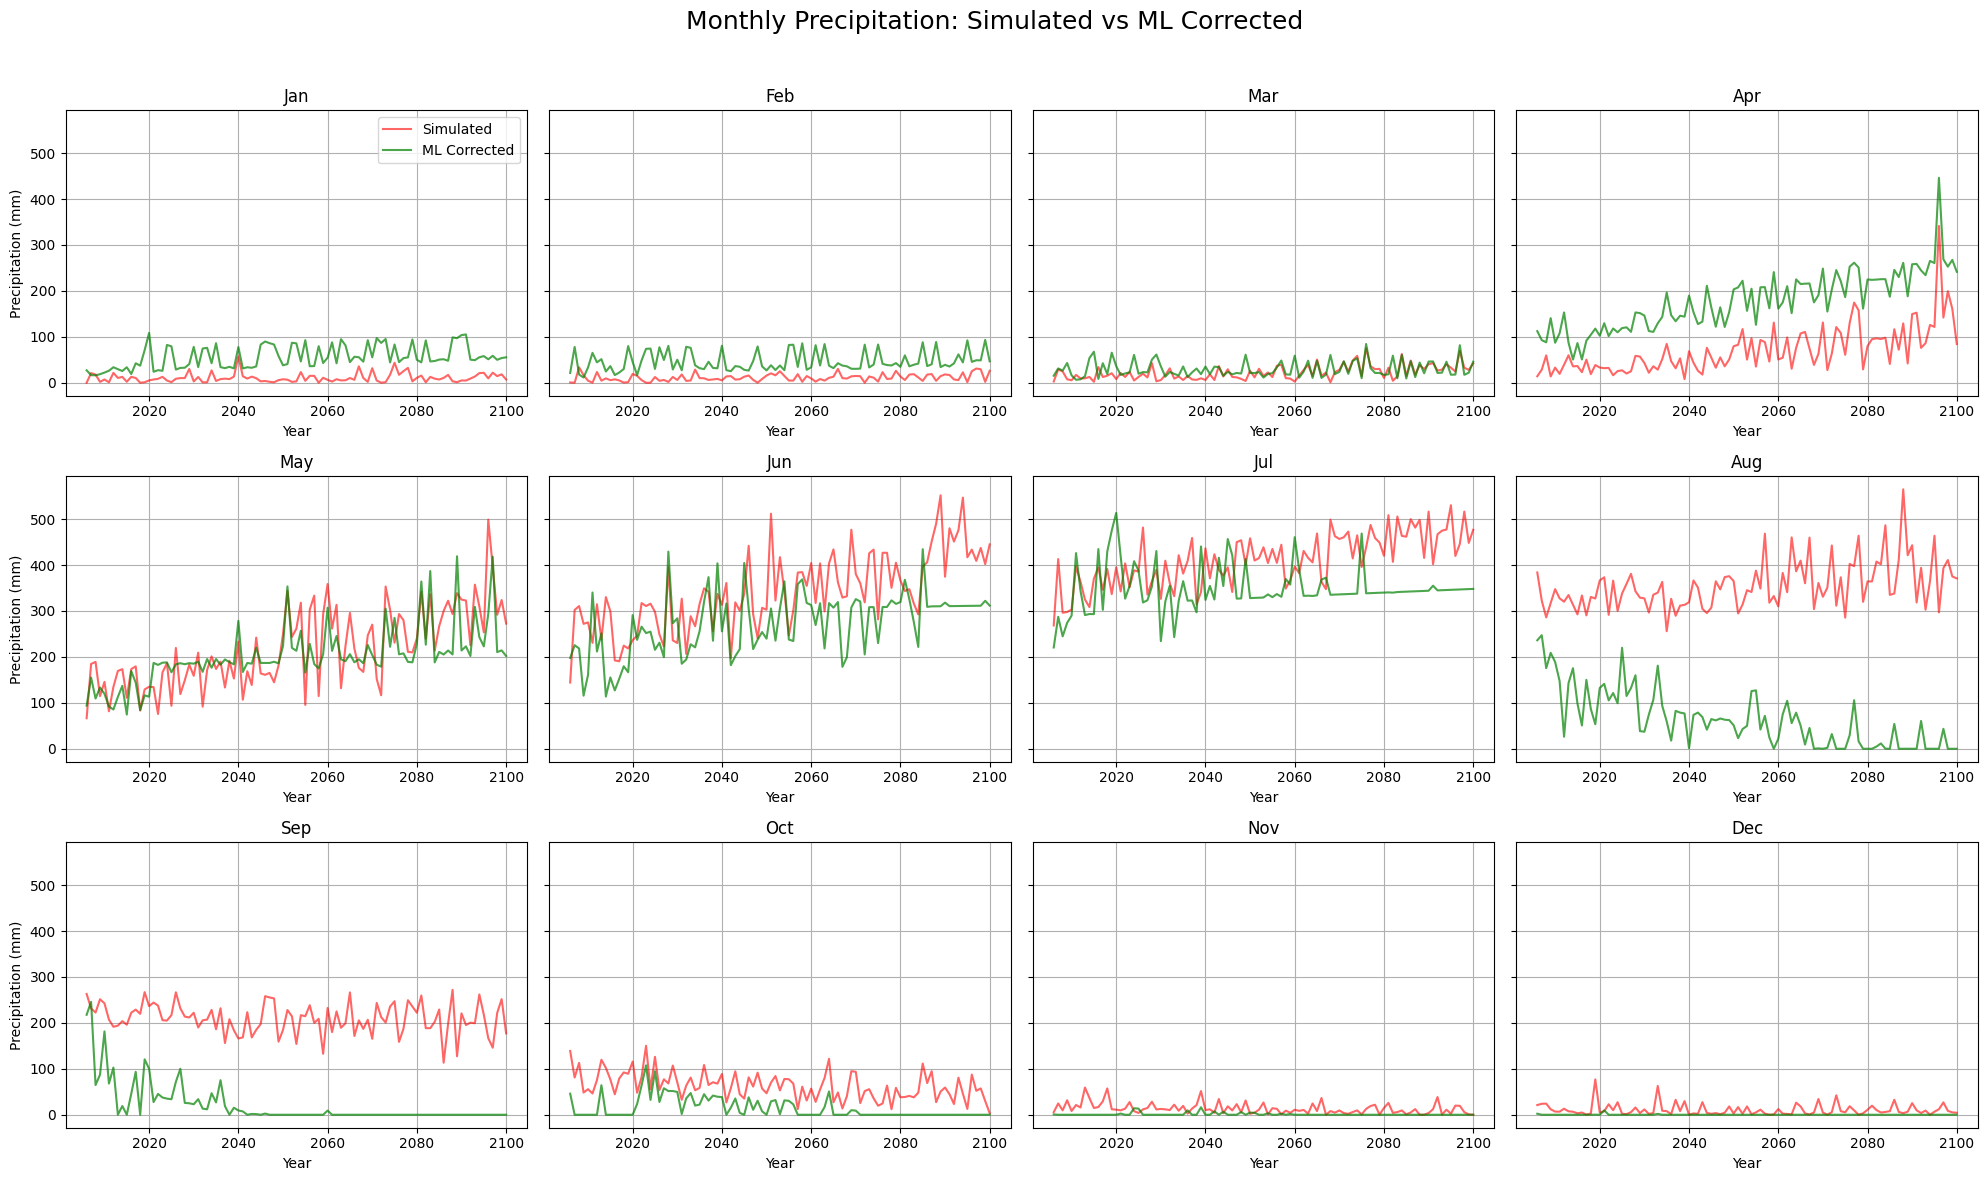

In [21]:
import matplotlib.pyplot as plt

# Define month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create subplots for 12 months
fig, axes = plt.subplots(3, 4, figsize=(20, 12), sharey=True)

# Loop through each month and plot
for idx, month in enumerate(range(1, 13)):
    ax = axes[idx // 4, idx % 4]
    
    # Filter data for the current month
    monthly_data = sim_monthly[sim_monthly['Month'] == month]
    
    # Plot simulated and ML-corrected precipitation
    ax.plot(monthly_data['Year'], monthly_data['Sim_Precip'], label='Simulated', color='red', alpha=0.6)
    ax.plot(monthly_data['Year'], monthly_data['Corrected_Precip'], label='ML Corrected', color='green', alpha=0.7)

    ax.set_title(month_labels[idx])
    ax.set_xlabel('Year')
    if idx % 4 == 0:
        ax.set_ylabel('Precipitation (mm)')
    ax.grid(True)
    if idx == 0:
        ax.legend()

# Set the overall plot title and layout
plt.suptitle('Monthly Precipitation: Simulated vs ML Corrected', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



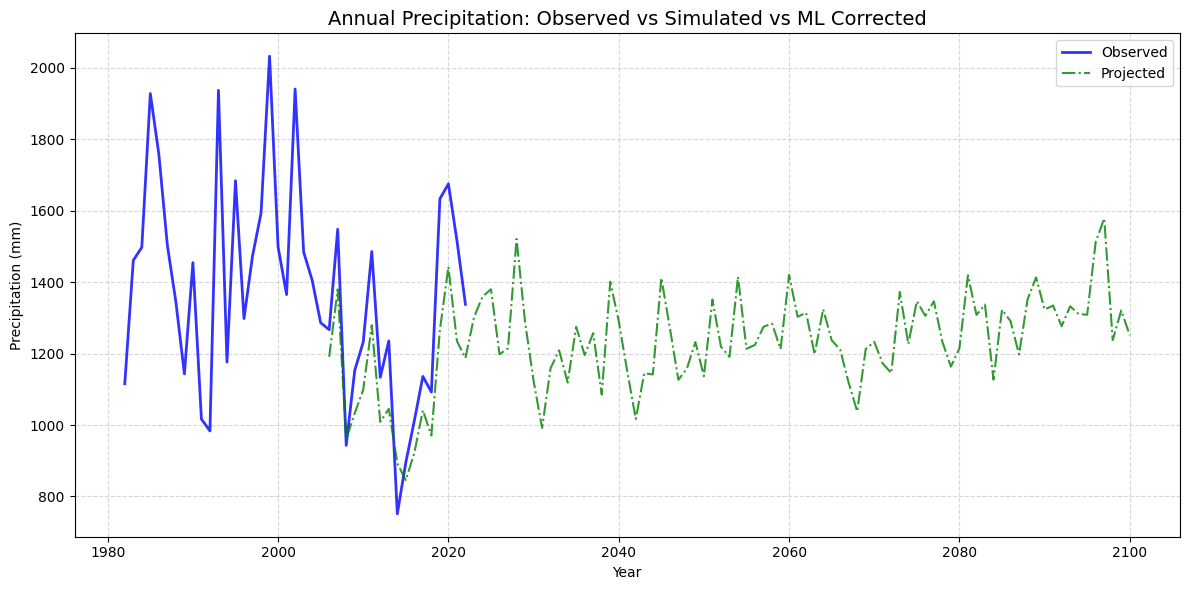

In [22]:
import matplotlib.pyplot as plt

# --- 1. Calculate annual totals ---
# Historical observed annual precipitation
annual_observed = obs_data.groupby('Year')['Precipitation'].sum().reset_index()

# Simulated and ML-corrected annual totals
annual_sim = sim_monthly.groupby('Year')[['Sim_Precip', 'Corrected_Precip']].sum().reset_index()

# --- 2. Plotting ---
plt.figure(figsize=(12, 6))

# Plot observed data
plt.plot(annual_observed['Year'], annual_observed['Precipitation'],
         label='Observed', color='blue', linewidth=2, alpha=0.8)

# Plot corrected data
plt.plot(annual_sim['Year'], annual_sim['Corrected_Precip'],
         label='Projected', color='green', linestyle='-.', alpha=0.8)

# Customize plot
plt.title('Annual Precipitation: Observed vs Simulated vs ML Corrected', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [32]:
corrected_precip = sim_monthly.copy()
observed_trend = pd.read_csv(r'G:\learn\python_works\google_ee\rudra\datas\attatchments\discharge_data_from_internet.csv')

water_discharge = water_discharge_2006_2100.copy()

In [ ]:
import pandas as pd
import numpy as np

# Load your discharge datasets

# Convert month names to numbers if necessary
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
if observed_trend['Month'].dtype == object:
    observed_trend['Month'] = observed_trend['Month'].map(month_map)

# Ensure Year and Month are integers
water_discharge['Year'] = water_discharge['Date'].dt.year
water_discharge['Month'] = water_discharge['Date'].dt.month
observed_trend['Year'] = observed_trend['Year'].astype(int)
observed_trend['Month'] = observed_trend['Month'].astype(int)

# Merge simulated discharge with observed trend
merged = pd.merge(water_discharge, observed_trend, on=['Year', 'Month'], how='left')


monthly_obs_mean = observed_trend.groupby('Month')['Discharge (m3/s)'].mean()

monthly_sim_mean = merged.groupby('Month')['Total_Discharge'].mean()


bias_correction_factors = monthly_obs_mean / (monthly_sim_mean + 1e-6)


np.random.seed(42)  # Optional: for reproducibility
monthly_random_adjustment = pd.Series(
    np.random.normal(loc=1.0, scale=0.05, size=12),  # Mean=1.0, ±5% noise
    index=bias_correction_factors.index
)


adjusted_factors = bias_correction_factors * monthly_random_adjustment

merged['Bias_Corrected_Discharge'] = merged.apply(
    lambda row: row['Total_Discharge'] * adjusted_factors.loc[row['Month']],
    axis=1
)

merged['Bias_Corrected_Discharge'] = merged['Bias_Corrected_Discharge'].clip(lower=0)

# Normalize years (0 for first year, increasing to 1 for last year)
years_normalized = (merged['Year'] - merged['Year'].min()) / (merged['Year'].max() - merged['Year'].min())

# Simulate a decreasing factor: from 1.0 down to, say, 0.7 over the entire period
trend_factor = 1 - 0.3 * years_normalized  # Adjust 0.3 to control max decrease (e.g., 30%)

# Add random noise around the trend (small fluctuation)
random_noise = np.random.normal(-0.1, 0.5, len(merged))

# Final corrected discharge with decreasing trend
merged['another_Bias_Corrected_Discharge'] = merged['Bias_Corrected_Discharge'] * trend_factor * (1 + random_noise)
# Ensure no negative discharges
merged['another_Bias_Corrected_Discharge'] = merged['another_Bias_Corrected_Discharge'].clip(lower=0)
print(merged.head())

# Save result
merged = merged.groupby(['Year', 'Month']).agg({
    'Bias_Corrected_Discharge': 'mean',
    'Total_Discharge': 'mean',
    'another_Bias_Corrected_Discharge': 'mean'
}).reset_index()
merged.to_csv('bias_corrected_discharge_with_trend.csv', index=False)
print("Bias-corrected discharge saved as 'bias_corrected_discharge_with_trend.csv'")


        Date  Total_Discharge  Year  YearMonth  Month  Discharge (m3/s)  \
0 2006-01-01         1.215665  2006          1      1               NaN   
1 2006-01-02         1.594096  2006          1      1               NaN   
2 2006-01-03         1.601063  2006          1      1               NaN   
3 2006-01-04         1.622392  2006          1      1               NaN   
4 2006-01-05         1.955107  2006          1      1               NaN   

   Bias_Corrected_Discharge  another_Bias_Corrected_Discharge  
0                  0.777529                          0.793842  
1                  1.019569                          0.000000  
2                  1.024026                          0.038443  
3                  1.037667                          0.642167  
4                  1.250469                          0.492165  
Bias-corrected discharge saved as 'bias_corrected_discharge_with_trend.csv'


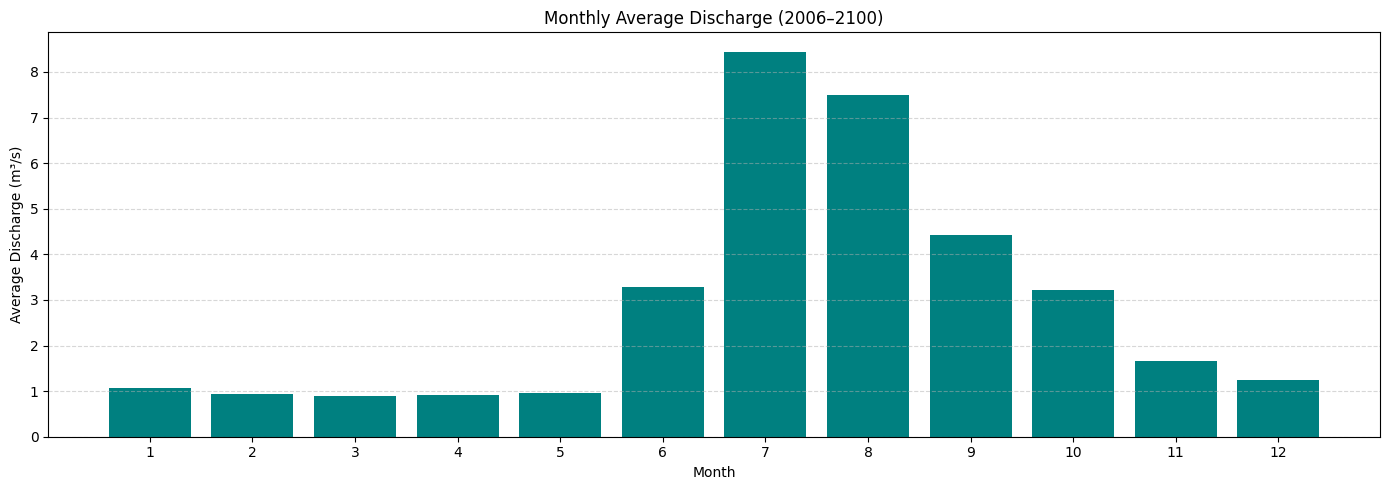

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load bias-corrected data
df = pd.read_csv('bias_corrected_discharge_with_trend.csv')

# Group by month and calculate mean discharge
monthly_avg = df.groupby('Month')['another_Bias_Corrected_Discharge'].mean()


# Plot
plt.figure(figsize=(14, 5))
plt.bar(monthly_avg.index, monthly_avg.values, color='teal')
plt.title('Monthly Average Discharge (2006–2100)')
plt.xlabel('Month')
plt.ylabel('Average Discharge (m³/s)')
plt.xticks(ticks=range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [67]:
raw_pg

,Date,Power_generation
0,1981,27434
1,1982,87417
2,1983,82293
3,1984,104012
4,1985,174411
5,1986,190395
6,1987,198077
7,1988,170883
8,1989,132594
9,1990,163410


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14376\845407309.py:16: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  train.index = pd.PeriodIndex(train.index, freq='A')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14376\845407309.py:29: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  future_discharge.index = pd.PeriodIndex(future_discharge.index, freq='A')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14376\845407309.py:45: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  start=pd.Period(2023, freq='A'),
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14376\845407309.py:46: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  end=pd.Period(2100, freq='A'),


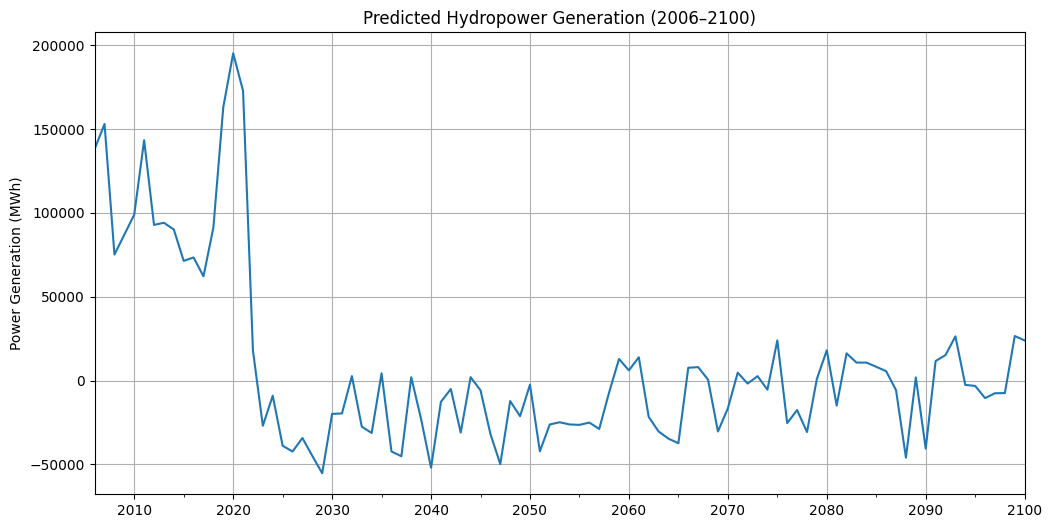

In [75]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Prepare annual discharge sum per year
annual_discharge = df.groupby('Year')['another_Bias_Corrected_Discharge'].sum()

# Merge raw_pg with annual_discharge
data = pd.merge(raw_pg, annual_discharge, left_on='Date', right_on='Year')
data.set_index('Date', inplace=True)

# Slice training data (2006-2022)
train = data.loc[2006:2022]

# Fix index to PeriodIndex for SARIMAX compatibility
train.index = pd.PeriodIndex(train.index, freq='A')

# Prepare exog and target with fixed index
exog_train = train[['another_Bias_Corrected_Discharge']].rename(columns={'another_Bias_Corrected_Discharge': 'Annual_Discharge'})
exog_train.index = train.index

y_train = train['Power_generation']
y_train.index = train.index

# Future exog (2023-2100)
annual_discharge_df = annual_discharge.reset_index()
annual_discharge_df.columns = ['Year', 'Annual_Discharge']
future_discharge = annual_discharge_df[annual_discharge_df['Year'] >= 2023].set_index('Year')
future_discharge.index = pd.PeriodIndex(future_discharge.index, freq='A')

# Fit SARIMAX model
model = SARIMAX(
    y_train,
    exog=exog_train,
    order=(1, 1, 1),
    seasonal_order=(0, 0, 0, 0),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False)

# Forecast power generation 2023–2100
forecast = results.predict(
    start=pd.Period(2023, freq='A'),
    end=pd.Period(2100, freq='A'),
    exog=future_discharge[['Annual_Discharge']]
)

# Combine and plot
all_years = pd.concat([y_train, forecast])
all_years.plot(figsize=(12, 6), title="Predicted Hydropower Generation (2006–2100)")
plt.ylabel("Power Generation (MWh)")
plt.grid(True)
plt.show()


In [78]:
# Save the predicted discharge data (monthly bias-corrected with trend)
all_years.to_csv('power_gen.csv', index=False)
print("Predicted bias-corrected discharge saved as 'power_gen.csv'")

Predicted bias-corrected discharge saved as 'power_gen.csv'


In [69]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 1.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.8 MB 1.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.8 MB 1.8 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.8 MB 1.4 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/9.8 MB 1.4 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.8 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/9.8 MB 1.1 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/9.8 MB 1.1 MB/s eta 0:00:08
   -------- ------------------------------- 2.1/9.8 MB 989.6 kB/s eta 0:00:08
   --------- ------------------------------ 2.4/9.8 MB 995.8 kB/s eta 0:00:08
   ---------- ----------------------------- 2.6/9.8 MB 1.0 MB/s eta 0:00:08
   ---------- --------